<a href="https://colab.research.google.com/github/sadiekc/PythonETAVProject/blob/main/PythonETAVProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
#Loading seaborn dataset
tips = sns.load_dataset("tips")

TRANSFORM: Cleanyourdataset.

a. Import your chosen dataset into a JupyterNotebook.

b. Clear out or convert any missing data.

c. Replace or remove any incorrect data.

d. Separate data into any number of appropriate dataframes (groupbys, logical separations, categorical separations,etc.)

In [159]:
#Checking for missing values that exist in the collection
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

No missing values in this dataset

In [169]:
#Renaming all the columns
tips.rename(columns={"total_bill": "Total Bill", "tip": "Tip", "sex": "Gender", "smoker": "Smoker", "day": "Day", "time": "Time", "size": "Size"}, inplace=True)

In [170]:
#Replacing abbreviation for days of the week 
tips["Day"] = tips["Day"].replace("Thur", "Thursday")
tips["Day"] = tips["Day"].replace("Fri", "Friday")
tips["Day"] = tips["Day"].replace("Sat", "Saturday")
tips["Day"] = tips["Day"].replace("Sun", "Sunday")

In [171]:
#separating data into appropriate dataframes
thursday = tips[tips["Day"] == "Thursday"]
friday = tips[tips["Day"] == "Friday"]
saturday = tips[tips["Day"] == "Saturday"]
sunday = tips[tips["Day"] == "Sunday"]

ANALYZE: Examine your dataset to understand its structure and any insights that maybe hidden within it.

a. Find the maximum, minimum, and average of all numerical data.

b. Group the data categorically and extract aggregate maximum, minimum and average values.

c. Add calculated columns to your dataframes to demonstrate important relationships between other columns.

d. Merge any related data on to your main dataframes.

e. Display any comparative data in a display dataframe.

f. Interpret the Data-Draw conclusions from observations.

In [172]:
tips.describe()

,Total Bill,Tip,Size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [174]:
#Grouping data categorically and calculating the maximum, minimum and average values
"Maximum bill: ", tips["Total Bill"].max()
"Minimum bill: ", tips["Total Bill"].min()
"Average bill: ", tips["Total Bill"].mean()

tips.groupby(["Gender", "Smoker"]).agg({"Total Bill" : ["max", "min", "mean"]})


Total Bill                 
                     max   min       mean
Gender Smoker                            
Male   Yes         50.81  7.25  22.284500
       No          48.33  7.51  19.791237
Female Yes         44.30  3.07  17.977879
       No          35.83  7.25  18.105185

In [187]:
#Adding a new column Tip percent
tips["tip_percent"] = (tips["Tip"]/tips["Total Bill"])*100

In [190]:
#Renaming new column
tips.rename(columns={"tip_percent": "Tip Percentage"}, inplace=True)

In [191]:
tips.head()

,Total Bill,Tip,Gender,Smoker,Day,Time,Size,Tip Percentage
0,16.99,1.01,Female,No,Sunday,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sunday,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sunday,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sunday,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sunday,Dinner,4,14.680765


In [192]:
#calculating average Tips by Gender and day
average_tips_by_Gender = tips.groupby(["Gender"])["Tip"].mean()
average_tips_by_Day = tips.groupby(["Day"])["Tip"].mean()

print(average_tips_by_Gender)
print(average_tips_by_Day)

Gender
Male      3.089618
Female    2.833448
Name: Tip, dtype: float64
Day
Thursday    2.771452
Friday      2.734737
Saturday    2.993103
Sunday      3.255132
Name: Tip, dtype: float64


In [194]:
#Merging data from days of the week onto the main dataframe
df = pd.concat([tips, sunday, saturday, friday, thursday])

df

,Total Bill,Tip,Gender,Smoker,Day,Time,Size,Tip Percentage
0,16.99,1.01,Female,No,Sunday,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sunday,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sunday,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sunday,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sunday,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
202,13.00,2.00,Female,Yes,Thursday,Lunch,2,NaN
203,16.40,2.50,Female,Yes,Thursday,Lunch,2,NaN
204,20.53,4.00,Male,Yes,Thursday,Lunch,4,NaN
205,16.47,3.23,Female,Yes,Thursday,Lunch,3,NaN


In [196]:
tips.isnull().sum()

Total Bill        0
Tip               0
Gender            0
Smoker            0
Day               0
Time              0
Size              0
Tip Percentage    0
dtype: int64

In [198]:
tips.dropna(inplace=True)
tips

,Total Bill,Tip,Gender,Smoker,Day,Time,Size,Tip Percentage
0,16.99,1.01,Female,No,Sunday,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sunday,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sunday,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sunday,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sunday,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Saturday,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Saturday,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Saturday,Dinner,2,8.822232
242,17.82,1.75,Male,No,Saturday,Dinner,2,9.820426


VISUALIZE: Create a few charts to easily visualize your drawn conclusions.

a. Plot the data using Pandas built-in plotting tool, or use MatPlotLib or Seaborn.

b. Use at least 2 different kinds of plots, preferably more.

Text(0.5, 1.0, 'Total Tips by Gender')

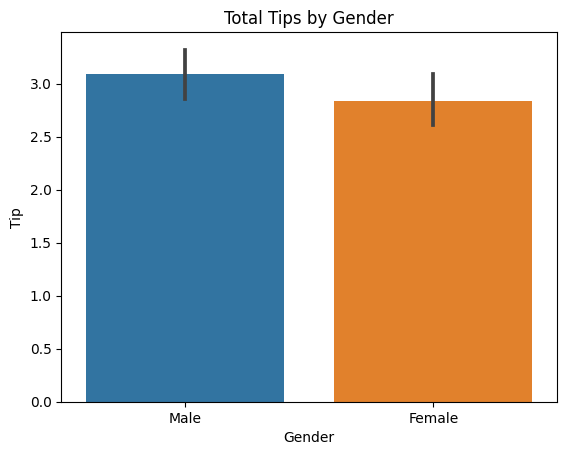

In [204]:
sns.barplot(x='Gender', y='Tip', data = tips)
plt.title("Total Tips by Gender")

This indicates that male gender made more tips than female.

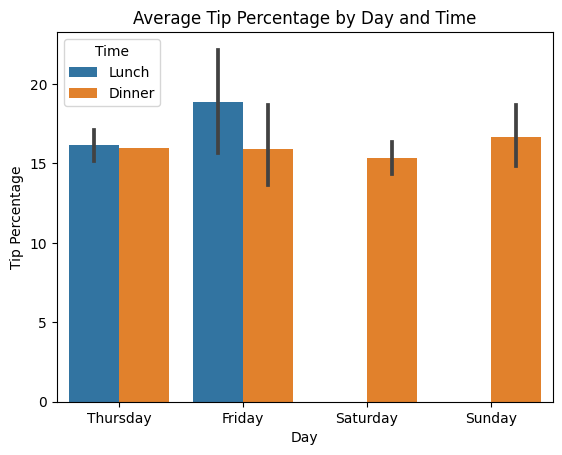

In [202]:
sns.barplot(data=tips, x='Day', y='Tip Percentage', hue='Time')
plt.title('Average Tip Percentage by Day and Time')
plt.show()

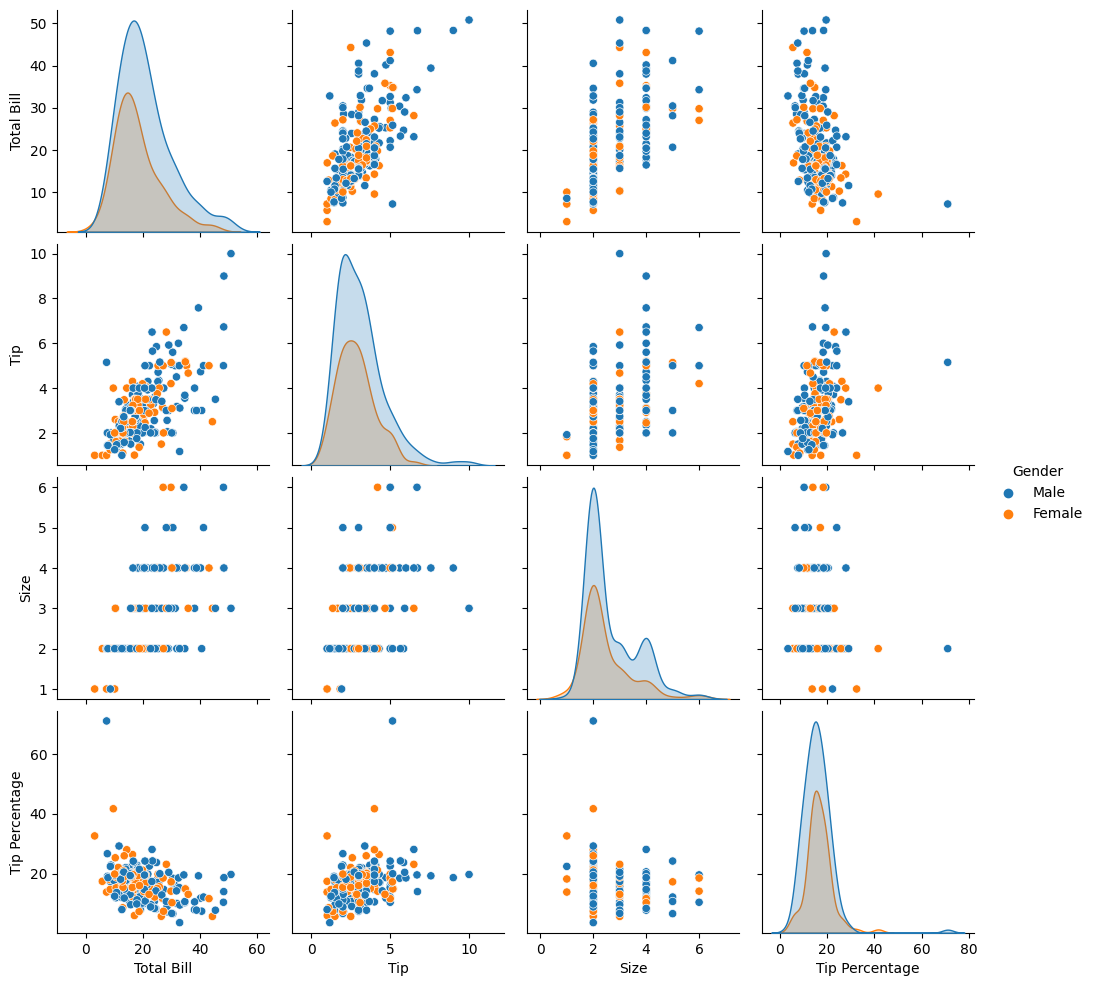

In [200]:
sns.pairplot(tips, hue="Gender")

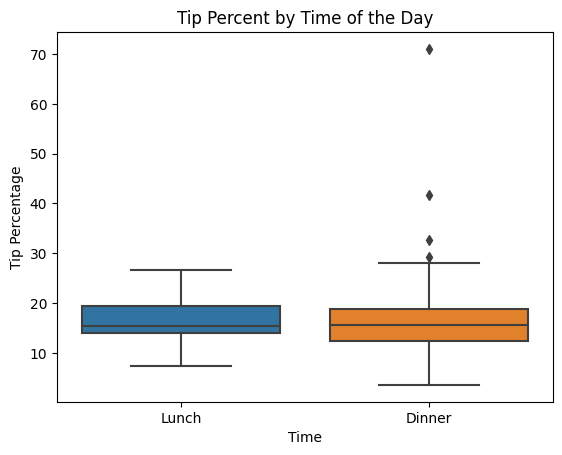

In [205]:
sns.boxplot(x="Time", y="Tip Percentage", data=tips)
plt.title("Tip Percent by Time of the Day")

plt.show()